In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

In [43]:
weather_meta = pd.read_csv('C:/Users/carro/OneDrive/Escritorio/CUNEF/Visualización/datos-metereologicos-2021-metadatos.csv')
weather_raw = pd.read_csv('C:/Users/carro/OneDrive/Escritorio/CUNEF/Visualización/datos-metereologicos-2021.csv')

In [44]:
weather_meta

,id,descripcion,tipo_datos,requerido,unidad
0,fecha,fecha del dia (AAAA-MM-DD),string,True,NaN
1,indicativo,indicativo climatológico,string,True,NaN
2,nombre,nombre (ubicación) de la estación,string,True,NaN
3,provincia,provincia de la estación,string,True,NaN
4,altitud,altitud de la estación en m sobre el nivel del...,float,True,m
5,tmed,Temperatura media diaria,float,False,°C
6,prec,Precipitación diaria de 07 a 07,float,False,"mm (Ip = inferior a 0,1 mm) (Acum = Precipitac..."
7,tmin,Temperatura Mínima del día,float,False,°C
8,horatmin,Hora y minuto de la temperatura mínima,string,False,UTC
9,tmax,Temperatura Máxima del día,float,False,°C


In [45]:
weather_raw.head()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,2021-01-01,4358X,DON BENITO,BADAJOZ,273,"6,7","0,0","2,7",23:59,"10,7",15:40,30.0,"2,5","7,8",15:40,"7,1","983,4",10,"980,5",05
1,2021-01-01,4220X,PUEBLA DE DON RODRIGO,CIUDAD REAL,486,"4,8","0,0","-0,1",23:59,"9,8",14:20,25.0,"1,4","7,2",02:50,NaN,NaN,NaN,NaN,NaN
2,2021-01-01,C447A,TENERIFE NORTE AEROPUERTO,STA. CRUZ DE TENERIFE,632,"12,8","0,7","10,1",02:22,"15,5",12:38,33.0,"1,7","8,3",00:30,"0,0","952,1",Varias,"949,3",18
3,2021-01-01,6106X,ANTEQUERA,MALAGA,408,"6,1","2,4","3,5",23:59,"8,7",14:20,34.0,"2,5","8,9",20:40,NaN,"966,8",11,"963,9",06
4,2021-01-01,9698U,TALARN,LLEIDA,807,"3,2","0,0","-1,6",23:00,"7,9",13:40,25.0,"2,2","7,5",15:20,"4,6","912,9",00,"910,0",13


In [46]:
weather = (weather_raw
           .assign(**{'fecha': lambda df: pd.to_datetime(df['fecha'])})
           .assign(**{'mes': lambda df: df['fecha'].dt.month})
           .assign(**{'tmed': lambda df: df['tmed'].str.replace(',', '.').astype(float)})
           .assign(**{'tmax': lambda df: df['tmax'].str.replace(',', '.').astype(float)})
           .assign(**{'tmin': lambda df: df['tmin'].str.replace(',', '.').astype(float)})
           .assign(
                prec=lambda d: pd.to_numeric(
                d['prec'].astype(str).str.replace(',', '.', regex=False),
                errors='coerce'
            ).fillna(0.0))
           )

In [47]:
weather['tmax-tmin'] = (weather['tmax'] - weather['tmin']).round(2)


### Provincias con temperaturas más estables durante todo el año:

In [66]:
cols = ['provincia', 'tmax-tmin']
weather_grouped = weather.loc[:, cols].copy()

weather_grouped = (weather_grouped
       .groupby('provincia', as_index=False)
       .agg({'tmax-tmin': 'mean'}))

bot10 = weather_grouped.nsmallest(10, 'tmax-tmin')

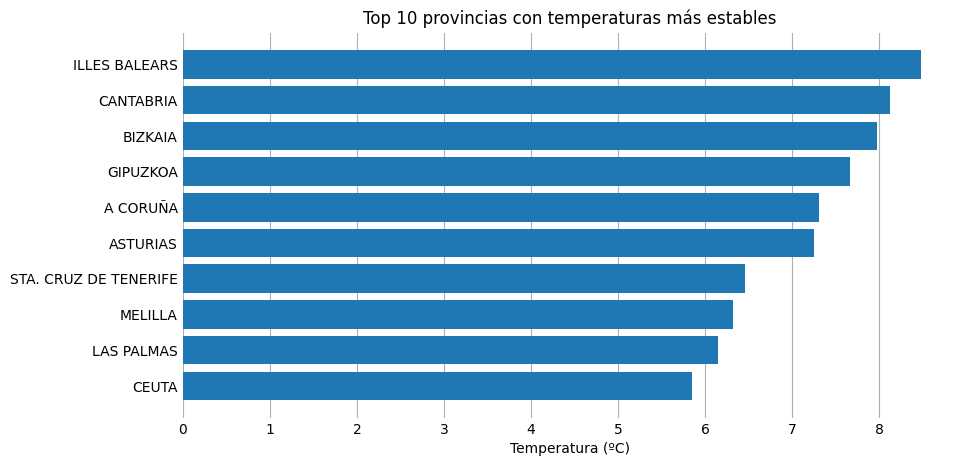

In [67]:
fig, ax = plt.subplots(figsize=(10, 5))

x = bot10['provincia']
y = bot10['tmax-tmin']

ax.barh(x,y, zorder=2)

ax.spines[:].set_visible(False)

ax.xaxis.set_tick_params(length=0)
ax.yaxis.set_tick_params(length=0)
ax.set_title('Top 10 provincias con temperaturas más estables')
ax.grid(axis='x')
ax.set_xlabel('Temperatura (ºC)')


plt.show()


### Evolución de las precipitaciones medias en 2021 en Andalucía

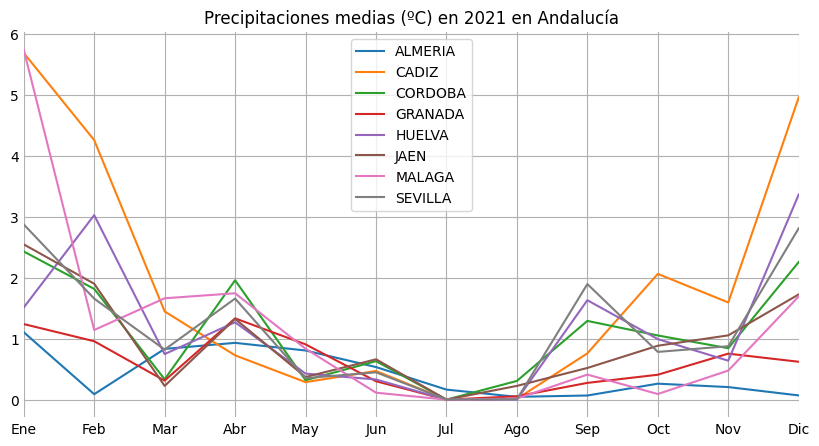

In [50]:
month_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

fig, ax = plt.subplots(figsize=(10, 5))

agg_data = (weather
    .groupby(['mes', 'provincia'], as_index=False)
    .agg(prec=('prec', 'mean'))
    .loc[lambda df: df['provincia'].isin(['SEVILLA', 'CADIZ', 'MALAGA', 'JAEN', 'HUELVA', 'CORDOBA', 'ALMERIA', 'GRANADA'])]
)

for provincia in agg_data['provincia'].unique():
    filtered_df = agg_data.loc[lambda df: df['provincia'] == provincia]
    x = filtered_df['mes']
    y = filtered_df['prec']
    ax.plot(x, y, label=provincia)

ax.legend()
ax.grid()
ax.set_title('Precipitaciones medias (ºC) en 2021 en Andalucía')
ax.set_xticks(range(1, 13), labels=month_names)

ax.set_xlim(1, 12)

ax.spines[:].set_visible(False)

ax.xaxis.set_tick_params(length=0)
ax.yaxis.set_tick_params(length=0)

plt.show()